In [ ]:
import osmnx as ox
import matplotlib.pyplot as plt
%matplotlib inline
place_name = "balaclava, Victoria, AU" 
graph = ox.graph_from_place(place_name)

In [98]:
import pandas as pd
house_df = pd.read_csv("../data/house_combined.csv")
surburb_list = house_df['surburb'].drop_duplicates().reset_index().drop('index', axis = 1)

In [99]:
surburb_list

,surburb
0,south melbourne
1,port melbourne
2,albert park
3,middle park
4,east melbourne
...,...
920,tallangatta
921,eskdale
922,dartmouth
923,beechworth


In [ ]:
import osmnx as ox
list_1 = {}
for surburb in surburb_list['surburb']:
    if(surburb == 'melbourne'):
        continue
    print(surburb)
    l = {}
    place_name = surburb+ ", Victoria, AU" 
    try:
        buildings = ox.geometries_from_place(place_name, tags = {'amenity': True, 'landuse':['retail','commercial']})
    except Exception:
        list_1[surburb] = None
        continue
    if len(buildings) == 0:
        list_1[surburb] = None
        continue
    for amenity, sub_df in buildings.groupby('amenity'):
        l[amenity] = len(sub_df)
    list_1[surburb] = l    

In [157]:
attribute_list = {**list_1, **list_2}
attribute_df = pd.DataFrame(attribute_list).T
attribute_df.to_csv('../data/raw/attribute_df.csv')
attribute_df = attribute_df[['bench','cafe','childcare','fast_food','kindergarten','parking','restaurant','place_of_worship','school','university']]

In [158]:
attribute_df

,bench,cafe,childcare,fast_food,kindergarten,parking,restaurant,place_of_worship,school,university
south melbourne,11.0,41.0,4.0,17.0,3.0,30.0,40.0,6.0,1.0,NaN
port melbourne,45.0,32.0,1.0,20.0,1.0,118.0,16.0,3.0,3.0,NaN
albert park,139.0,144.0,6.0,59.0,7.0,289.0,172.0,24.0,12.0,2.0
middle park,7.0,5.0,NaN,2.0,2.0,NaN,4.0,1.0,1.0,NaN
east melbourne,102.0,19.0,NaN,1.0,1.0,55.0,8.0,10.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
tallangatta,NaN,3.0,NaN,1.0,NaN,4.0,NaN,1.0,3.0,NaN
eskdale,NaN,1.0,NaN,NaN,NaN,1.0,NaN,2.0,1.0,NaN
dartmouth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
beechworth,1.0,6.0,NaN,NaN,1.0,31.0,4.0,3.0,4.0,NaN


In [359]:
leisure_list = {}
for surburb in surburb_list['surburb']:
    if(surburb == 'melbourne'):
        continue
    print(surburb)
    l = {}
    place_name = surburb+ ", Victoria, AU" 
    try:
        leisure = ox.geometries_from_place(place_name, tags={'leisure':True})
    except Exception:
        leisure_list[surburb] = None
        continue
    if len(leisure) == 0:
        leisure_list[surburb] = None
        continue
    for leisure, sub_df in leisure.groupby('leisure'):
        l[leisure] = len(sub_df)
    leisure_list[surburb] = l    

south melbourne
port melbourne
albert park
middle park
east melbourne
st kilda
south yarra
southbank
st kilda west
elwood
north melbourne
carlton
black rock
fitzroy
abbotsford


/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/heyonglin/opt/anaconda3/lib/python3.9/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geo

elsternwick
toorak
prahran
st kilda east
richmond


In [354]:
leisure = ox.geometries_from_place('elsternwick', tags={'leisure':True})
len(leisure)

0

In [238]:

for leisure , sub_df in leisure.groupby('leisure'):
    print(leisure, len(sub_df))

bleachers 1
dance 1
dog_park 1
fitness_centre 3
golf_course 2
ice_rink 6
nature_reserve 10
outdoor_seating 1
park 24
pitch 35
playground 11
slipway 1
sports_centre 4
swimming_pool 2
track 3
trailhead 2


<AxesSubplot:>

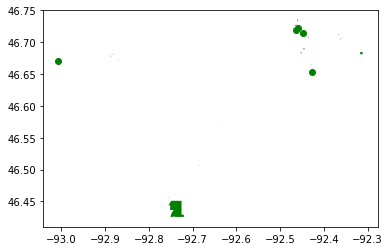

In [161]:
parks = leisure[leisure["leisure"].isin(["pitch","park","playground"])]
parks.plot(color="green")

Download Australia CPI data


In [ ]:
website = 'https://www.rba.gov.au/inflation/measures-cpi.html'
cpi_df = pd.read_html(website)[0]

In [251]:
cpi_df = cpi_df[[(           'Unnamed: 0_level_0',                     'Date'),
            (         'Consumer price index',               'All groups')]]
cpi_df

,Unnamed: 0_level_0,Consumer price index
,Date,All groups
0,2018/2019,2018/2019
1,Sep,1.9
2,Dec,1.8
3,Mar,1.3
4,Jun,1.6
5,2019/2020,2019/2020
6,Sep,1.7
7,Dec,1.8
8,Mar,2.2


In [252]:
filter_cpi_df = pd.DataFrame()
filter_cpi_df['date'] = cpi_df[(           'Unnamed: 0_level_0',                     'Date')]
filter_cpi_df['Consumer price index'] = cpi_df[(         'Consumer price index',               'All groups')]

In [253]:
filter_cpi_df['date'] = cpi_df[(           'Unnamed: 0_level_0',                     'Date')]
filter_cpi_df['Consumer price index'] = cpi_df[(         'Consumer price index',               'All groups')]

In [254]:
filter_cpi_df

,date,Consumer price index
0,2018/2019,2018/2019
1,Sep,1.9
2,Dec,1.8
3,Mar,1.3
4,Jun,1.6
5,2019/2020,2019/2020
6,Sep,1.7
7,Dec,1.8
8,Mar,2.2
9,Jun,−0.3


In [255]:
filter_cpi_df = filter_cpi_df[0:-1]
years = None
data_list = []
for index, item in filter_cpi_df.iterrows():
    mod = index % 5
    if mod == 0:
        years = [int(year) for year in item['date'].split('/') ]
        continue
    cpi = eval(item['Consumer price index'].replace('−','-'))
    if mod == 1:
        data_list.append([years[0],9,cpi])
    elif mod == 2:
        data_list.append([years[0],12,cpi ])
    elif mod == 3:
        data_list.append([years[1],3,cpi ])
    else:
        data_list.append([years[1],6,cpi ])




In [257]:
l = []
for year, month, rate in data_list:
    if month == 9:
        l.append([year, 8, rate])
        l.append([year, month, rate])
        l.append([year, 10, rate])
    elif month == 12:
        l.append([year, 11, rate])
        l.append([year, month, rate])
        l.append([year+1, 1, rate])
    elif month == 3:
        l.append([year, 2, rate])
        l.append([year, month, rate])
        l.append([year, 4, rate])
    else:
        l.append([year, 5, rate])
        l.append([year, month, rate])
        l.append([year, 7, rate])



In [256]:
data_list

[[2018, 9, 1.9],
 [2018, 12, 1.8],
 [2019, 3, 1.3],
 [2019, 6, 1.6],
 [2019, 9, 1.7],
 [2019, 12, 1.8],
 [2020, 3, 2.2],
 [2020, 6, -0.3],
 [2020, 9, 0.7],
 [2020, 12, 0.9],
 [2021, 3, 1.1],
 [2021, 6, 3.8],
 [2021, 9, 3.0],
 [2021, 12, 3.5],
 [2022, 3, 5.1],
 [2022, 6, 6.1]]

In [258]:
l

[[2018, 8, 1.9],
 [2018, 9, 1.9],
 [2018, 10, 1.9],
 [2018, 11, 1.8],
 [2018, 12, 1.8],
 [2019, 1, 1.8],
 [2019, 2, 1.3],
 [2019, 3, 1.3],
 [2019, 4, 1.3],
 [2019, 5, 1.6],
 [2019, 6, 1.6],
 [2019, 7, 1.6],
 [2019, 8, 1.7],
 [2019, 9, 1.7],
 [2019, 10, 1.7],
 [2019, 11, 1.8],
 [2019, 12, 1.8],
 [2020, 1, 1.8],
 [2020, 2, 2.2],
 [2020, 3, 2.2],
 [2020, 4, 2.2],
 [2020, 5, -0.3],
 [2020, 6, -0.3],
 [2020, 7, -0.3],
 [2020, 8, 0.7],
 [2020, 9, 0.7],
 [2020, 10, 0.7],
 [2020, 11, 0.9],
 [2020, 12, 0.9],
 [2021, 1, 0.9],
 [2021, 2, 1.1],
 [2021, 3, 1.1],
 [2021, 4, 1.1],
 [2021, 5, 3.8],
 [2021, 6, 3.8],
 [2021, 7, 3.8],
 [2021, 8, 3.0],
 [2021, 9, 3.0],
 [2021, 10, 3.0],
 [2021, 11, 3.5],
 [2021, 12, 3.5],
 [2022, 1, 3.5],
 [2022, 2, 5.1],
 [2022, 3, 5.1],
 [2022, 4, 5.1],
 [2022, 5, 6.1],
 [2022, 6, 6.1],
 [2022, 7, 6.1]]

In [260]:
cpi_df = pd.DataFrame(l, columns=['year','month','Consumer price index'])
cpi_df

,year,month,Consumer price index
0,2018,8,1.9
1,2018,9,1.9
2,2018,10,1.9
3,2018,11,1.8
4,2018,12,1.8
5,2019,1,1.8
6,2019,2,1.3
7,2019,3,1.3
8,2019,4,1.3
9,2019,5,1.6


In [282]:
website_2 = 'https://www.rba.gov.au/publications/smp/2022/aug/forecasts.html'
cpi_future_df = pd.read_html(website_2)[0]

In [333]:
future_df = pd.DataFrame()
future_df['Consumer price index'] = cpi_future_df.iloc[16][1:]
# future_df = future_df.reset_index()

In [334]:
future_df

,Consumer price index
Jun 2022,6.1
Dec 2022,7.8
Jun 2023,6.2
Dec 2023,4.3
Jun 2024,3.5
Dec 2024,3.0


In [335]:
month_list = []
year_list = []
for index, df in future_df.iterrows():
    index = index.split(' ')
    if index[0] == 'Jun':
        month_list.append(6)
    elif index[0] == 'Dec':
        month_list.append(12)
    year_list.append(index[1])

In [336]:
future_df['month'] = month_list
future_df['year'] = year_list

In [341]:
future_df = future_df.reset_index().drop('index', axis = 1).iloc[1:]
future_df

,Consumer price index,month,year
1,7.8,12,2022
2,6.2,6,2023
3,4.3,12,2023
4,3.5,6,2024
5,3.0,12,2024


In [342]:
pd.concat([cpi_df,future_df])

,year,month,Consumer price index
0,2018,8,1.9
1,2018,9,1.9
2,2018,10,1.9
3,2018,11,1.8
4,2018,12,1.8
5,2019,1,1.8
6,2019,2,1.3
7,2019,3,1.3
8,2019,4,1.3
9,2019,5,1.6
